# Importing Required Libraries

To implement exhaustive feature selection and perform various data manipulation, preprocessing, model creation, and evaluation tasks, the following libraries are imported:

- `itertools`: This library provides functions for generating all combinations of elements in a set.
- `pandas`: It is used for reading and manipulating data.
- `yfinance`: This library enables the downloading of cryptocurrency data.
- `sklearn.preprocessing.StandardScaler`: It performs data preprocessing by scaling the features.
- `sklearn.model_selection.train_test_split`: This function splits the data into training and testing sets.
- `sklearn.linear_model.LogisticRegression`: It creates a logistic regression model for classification.
- `sklearn.metrics`: This module includes various performance metrics for evaluating models.
- `sklearn.ensemble.RandomForestClassifier`: It creates a random forest model for classification.
- `sklearn.metrics.accuracy_score`, `sklearn.metrics.precision_score`, `sklearn.metrics.recall_score`, `sklearn.metrics.f1_score`, `sklearn.metrics.roc_auc_score`, `sklearn.metrics.confusion_matrix`: These functions are used to calculate different evaluation metrics for the models.
- `sklearn.model_selection.train_test_split`: This function is used to split the data into training and testing sets.
- `sklearn.impute.SimpleImputer`: It is used for imputing missing values in the data.

The code snippet demonstrates the import of these libraries to support the various tasks involved in implementing exhaustive feature selection, data manipulation, preprocessing, model creation, and evaluation.


In [66]:
# to get the all subsets of a set for implement exhaustive feature selection
from itertools import chain, combinations

# to read and manipulation data
import pandas as pd

# to download data of the cryptocurrency
import yfinance as yf

# to preprocess the data, make, train and evaluate the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# to draw a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading Cryptocurrency Data

To download data for a specific cryptocurrency, the following code snippet utilizes the `yfinance` library.

In [67]:
# download data of the cryptocurrency

df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d", start="2023-01-01", end="2023-10-09")

[*********************100%%**********************]  1 of 1 completed


In [68]:
# show the downloaded data
df_xmr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,147.309662,148.931030,146.437485,148.576935,148.576935,36453347
2023-01-02,148.582184,149.623535,147.943558,147.943558,147.943558,47050925
2023-01-03,147.933929,149.027832,147.628860,148.487930,148.487930,48662135
2023-01-04,148.466995,152.488983,148.342621,150.743652,150.743652,83915181
2023-01-05,150.790253,155.921738,150.769043,155.921738,155.921738,78049428


# Data Manipulation and Feature Engineering

This code snippet demonstrates data manipulation and feature engineering steps performed on the downloaded cryptocurrency data.

1. Calculating the Actual Class Labels:
   - The code compares the closing prices of the "XMR-USD" cryptocurrency from January 4, 2023, onwards with the closing prices between January 3, 2023, and October 7, 2023.
   - The comparison is done element-wise, and the resulting boolean values are converted to binary values (0 or 1) using `astype(int)`.
   - The calculated class labels representing price increase or decrease are stored in the `actual_class` variable.

2. Dropping a Specific Date:
   - The code removes a specific date, "2023-10-08", from the `df_xmr` dataframe.
   - This operation eliminates the corresponding row from the dataframe.

3. Creating a New Feature: "Price increase (in the next day)":
   - The code adds a new feature called "Price increase (in the next day)" to the `df_xmr` dataframe.
   - The feature is populated with the values from the `actual_class` variable, representing the price increase (1) or decrease (0) in the subsequent day.

These data manipulations and feature engineering steps are performed to prepare the data for further analysis or modeling.

Please note that the code assumes the existence of the `df_xmr` dataframe, which should contain the downloaded cryptocurrency data.

In [69]:
actual_class = (
    (df_xmr.loc["2023-01-04":, "Close"].to_numpy() > df_xmr.loc["2023-01-03":"2023-10-07", "Close"]).astype(int)
)
df_xmr = df_xmr.drop("2023-10-08")
df_xmr["Price increase (in the next day)"] = actual_class

# Splitting the Data into Training, Validation, and Test Sets

The code splits the data into training, validation, and test sets to evaluate the model's performance and assess its generalizability. The `train_test_split` function from the `sklearn.model_selection` module is used for this purpose.

1. Initial Split:
   - The `df_xmr` dataframe is initially split into two parts: `train_data` and `test_data`.
   - The `test_data` portion is 20% of the original data, while the `train_data` portion contains the remaining 80% of the data.

2. Further Splitting:
   - The `train_data` portion is further split into two parts: `train_data` and `val_data`.
   - The `val_data` portion is also 20% of the `train_data`, while the `train_data` retains the remaining 80% of the data.

By splitting the data into training, validation, and test sets, it allows for different stages of model development and evaluation:
- The `train_data` set is used for training the model.
- The `val_data` set is utilized for hyperparameter tuning and assessing the model's performance.
- The `test_data` set serves as an independent dataset to evaluate the final model's generalization ability and performance.

Please note that setting `shuffle=False` ensures that the data is split sequentially, maintaining the temporal order of the data. This can be important in scenarios such as time-series analysis or any other case where the order of the data is significant.

In [70]:
# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(df_xmr, test_size=0.2, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=False)

# Defining Feature Columns and Target Variable

The code snippet defines the feature columns and target variable for the model training and prediction.

1. Feature Columns:
   - The `feature_cols` list specifies the names of the columns from the dataset that will serve as input features for the model.
   - In this case, the feature columns include `'Open'`, `'High'`, `'Low'`, `'Close'`, `'Adj Close'`, and `'Volume'`.

2. Target Variable:
   - The `target_col` variable represents the target variable or the column that the model aims to predict.
   - In this case, the target variable is `'Price increase (in the next day)'`.

By defining the feature columns and target variable, the code establishes which features will be used as inputs and which column the model will predict during the training and evaluation process.



In [71]:
# Define feature columns and target variable
feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col = 'Price increase (in the next day)'

# Splitting Features and Target Variable for Training, Validation, and Test Sets

The code snippet splits the features and target variable into separate variables for the training, validation, and test sets. This step is crucial for preparing the data for model training and evaluation.

1. Training Set:
   - The `X_train` variable contains the features for the training set.
   - The features are obtained from the `train_data` dataframe using the specified `feature_cols`.
   - The `y_train` variable represents the corresponding target variable for the training set.
   - The target variable is obtained from the `train_data` dataframe using the specified `target_col`.

2. Validation Set:
   - The `X_val` variable contains the features for the validation set.
   - The features are obtained from the `val_data` dataframe using the specified `feature_cols`.
   - The `y_val` variable represents the corresponding target variable for the validation set.
   - The target variable is obtained from the `val_data` dataframe using the specified `target_col`.

3. Test Set:
   - The `X_test` variable contains the features for the test set.
   - The features are obtained from the `test_data` dataframe using the specified `feature_cols`.
   - The `y_test` variable represents the corresponding target variable for the test set.
   - The target variable is obtained from the `test_data` dataframe using the specified `target_col`.

By splitting the features and target variable for each set, the code prepares the data in separate variables for model training and evaluation on the training, validation, and test sets.



In [72]:
# Split features and target variable for training, validation, and test sets
X_train, y_train = train_data[feature_cols], train_data[target_col]
X_val, y_val = val_data[feature_cols], val_data[target_col]
X_test, y_test = test_data[feature_cols], test_data[target_col]

# Handling Missing Values in the Features and Target Variables

The code snippet handles missing values in the features and target variables using the `SimpleImputer` class from the `sklearn.impute` module.

1. Creating an Imputer:
   - An instance of the `SimpleImputer` class is created with the `strategy` parameter set to `"mean"`.
   - The `"mean"` strategy replaces missing values with the mean of the non-missing values in the respective column.

2. Handling Missing Values:
   - The missing values in the training set, `X_train`, are handled by fitting the imputer on the training data using the `fit_transform()` method.
   - The missing values in the validation set, `X_val`, are handled by transforming the validation data using the `transform()` method.
   - The missing values in the test set, `X_test`, are also handled by transforming the test data using the `transform()` method.

By applying the `SimpleImputer` with the mean strategy, the code replaces missing values in the features with the mean of the non-missing values in each respective column.



In [73]:
# Handle missing values in the features and target variables
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Handling Missing Values in the Target Variable

The code snippet handles missing values in the target variable using the `SimpleImputer` class from the `sklearn.impute` module.

1. Creating an Imputer:
   - An instance of the `SimpleImputer` class is created with the `strategy` parameter set to `"most_frequent"`.
   - The `"most_frequent"` strategy replaces missing values with the most frequent value in the respective column.

2. Handling Missing Values:
   - Missing values in the training set target variable, `y_train`, are handled by fitting the imputer on the training target data using the `fit_transform()` method.
   - Missing values in the validation set target variable, `y_val`, are handled by transforming the validation target data using the `transform()` method.
   - Missing values in the test set target variable, `y_test`, are also handled by transforming the test target data using the `transform()` method.

By applying the `SimpleImputer` with the most frequent strategy, the code replaces missing values in the target variable with the most frequent value in the respective column.

Handling missing values in the target variable is important to ensure that the data is complete and suitable for model training and evaluation.

In [74]:
# Handle missing values in the target variable
imputer_target = SimpleImputer(strategy="most_frequent")
y_train = imputer_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val = imputer_target.transform(y_val.values.reshape(-1, 1)).ravel()
y_test = imputer_target.transform(y_test.values.reshape(-1, 1)).ravel()

# Training the Random Forest Model

The code snippet trains a random forest model using the `RandomForestClassifier` class from the `sklearn.ensemble` module.

1. Creating the Model:
   - An instance of the `RandomForestClassifier` class is created with the `n_estimators` parameter set to `100` and the `random_state` parameter set to `42`.
   - The `n_estimators` parameter specifies the number of decision trees in the random forest, and the `random_state` parameter ensures reproducibility of the results.

2. Training the Model:
   - The model is trained on the training data by calling the `fit()` method on the model object.
   - The `fit()` method takes the training features, `X_train`, and the corresponding training target variable, `y_train`, as input.

By executing these steps, the code trains a random forest model on the provided training data.

Please note that the specific parameters chosen for the random forest model, such as the number of estimators, can be adjusted based on the dataset and the problem at hand.

In [75]:
# Train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Making Predictions on the Validation Set

The code snippet makes predictions on the validation set using the trained random forest model.

1. Making Predictions:
   - The `predict()` method is called on the trained random forest model, `model`, to generate predictions for the validation set, `X_val`.
   - The `predict()` method takes the validation features, `X_val`, as input and returns the predicted target values.

By executing these steps, the code generates predictions for the validation set using the trained random forest model.

Please note that the predictions can be further evaluated using appropriate metrics or compared against the actual target values to assess the model's performance.

In [76]:
# Make predictions on the validation set
val_predictions = model.predict(X_val)

In [77]:
val_predictions

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.])

# Evaluating Model Performance on the Validation Set

The code snippet evaluates the performance of the trained random forest model on the validation set by calculating various evaluation metrics.

1. Accuracy:
   - The `accuracy_score()` function from the `sklearn.metrics` module is used to calculate the accuracy of the model's predictions on the validation set.
   - The `accuracy_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the accuracy score.

2. Precision:
   - The `precision_score()` function is used to calculate the precision of the model's predictions on the validation set.
   - The `precision_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the precision score.

3. Recall:
   - The `recall_score()` function is used to calculate the recall of the model's predictions on the validation set.
   - The `recall_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the recall score.

4. F1 Score:
   - The `f1_score()` function is used to calculate the F1 score of the model's predictions on the validation set.
   - The `f1_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the F1 score.

5. AUC-ROC Score:
   - The `roc_auc_score()` function is used to calculate the AUC-ROC score of the model's predictions on the validation set.
   - The `roc_auc_score()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the AUC-ROC score.

6. Confusion Matrix:
   - The `confusion_matrix()` function is used to calculate the confusion matrix of the model's predictions on the validation set.
   - The `confusion_matrix()` function takes the actual target values, `y_val`, and the predicted target values, `val_predictions`, as input and returns the confusion matrix.

By executing these steps, the code evaluates the performance of the trained random forest model on the validation set using various evaluation metrics.


In [78]:
# Evaluate model performance on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)
auc = roc_auc_score(y_val, val_predictions)
confusion = confusion_matrix(y_val, val_predictions)

In [79]:
# Print evaluation metrics and confusion matrix
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC: {auc}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.5555555555555556
Precision: 0.5882352941176471
Recall: 0.43478260869565216
F1 Score: 0.5
AUC: 0.558300395256917
Confusion Matrix:
[[15  7]
 [13 10]]


# Making Predictions on the Test Set

The code snippet makes predictions on the test set using the trained random forest model.

1. Making Predictions:
   - The `predict()` method is called on the trained random forest model, `model`, to generate predictions for the test set, `X_test`.
   - The `predict()` method takes the test features, `X_test`, as input and returns the predicted target values.

By executing these steps, the code generates predictions for the test set using the trained random forest model.



In [80]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

In [81]:
test_predictions

array([0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.])

# Evaluating Model Performance on the Test Set

The code snippet evaluates the performance of the trained random forest model on the test set by calculating various evaluation metrics.




In [82]:
# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_auc = roc_auc_score(y_test, test_predictions)
test_confusion = confusion_matrix(y_test, test_predictions)

In [83]:
# Print evaluation metrics and confusion matrix for the test set
print('\nTest Set Performance:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test AUC: {test_auc}')
print('Test Confusion Matrix:')
print(test_confusion)


Test Set Performance:
Test Accuracy: 0.625
Test Precision: 0.6304347826086957
Test Recall: 0.8787878787878788
Test F1 Score: 0.7341772151898734
Test AUC: 0.5698287220026351
Test Confusion Matrix:
[[ 6 17]
 [ 4 29]]


# Creating a Heatmap Using Seaborn

The code snippet creates a heatmap using the Seaborn library based on the `test_confusion` matrix.

1. Creating a Heatmap:
   - The `sns.heatmap()` function from the Seaborn library is used to create a heatmap.
   - The `test_confusion` matrix is passed as input to the `sns.heatmap()` function.
   - Additional arguments are provided to customize the heatmap:
     - `cmap='coolwarm'`: Sets the color map for the heatmap.
     - `annot=True`: Enables annotations to be displayed in each cell of the heatmap.
     - `fmt=".1f"`: Formats the annotations to display one decimal place.

2. Adding Labels and Title:
   - The `plt.xlabel()` function is used to add a label to the x-axis, which is set to 'Predicted Labels'.
   - The `plt.ylabel()` function is used to add a label to the y-axis, which is set to 'True Labels'.

3. Displaying the Plot:
   - The `plt.show()` function is called to display the heatmap plot.


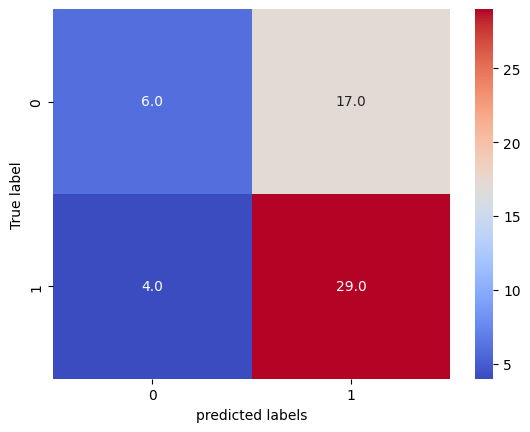

In [84]:
# Create a heatmap using Seaborn
sns.heatmap(test_confusion, cmap='coolwarm', annot=True, fmt=".1f")

# Add labels and title
plt.xlabel('predicted labels')
plt.ylabel('True label')

# Display the plot
plt.show()